# Lab 4
### Contrast Enhancement

http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_hist



In [1]:
from commonfunctions import *
from skimage.exposure import equalize_hist
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np

# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray

def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

# Negative Transformation

###  new = 255 - old
###  new = 1 - old (if normalized)

In [3]:
'''
1
Negative Transformation
'''
def Negative(img):
    newImg = 1 - img
    return newImg


<ipython-input-4-3b4505c9fc28>:1: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  img = rgb2gray(io.imread('imgs/Picture1.png'))


(160, 137)
(160, 137)


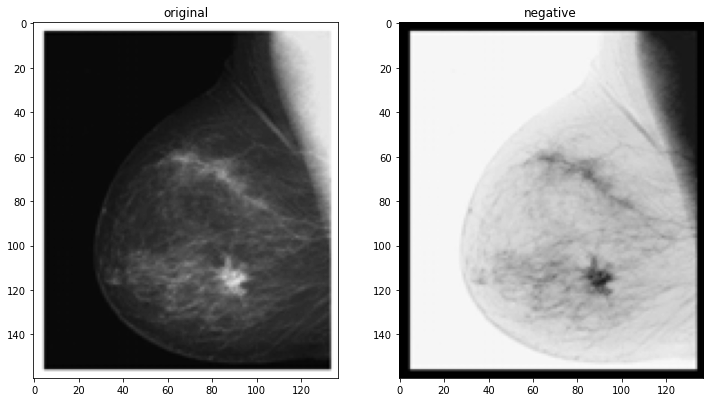

In [4]:
img = rgb2gray(io.imread('imgs/Picture1.png'))
print(img.shape)
negativeImg = Negative(img)
print(negativeImg.shape)
show_images([img,negativeImg],titles=["original","negative"])

# Contrast Enhancement

In [5]:
'''
2
Contrast Enhancement
'''
def Contrast_enhancement(img):
    newImg = np.copy(img)*255
    newImg = newImg.astype(np.uint8)
#     print(img.dtype)
#     img =img.astype(np.uint8)
#     print("max ",img.max())
#     newImg = np.copy(img)
    print(newImg[( (newImg >=0) & (newImg<=100))])
    newImg[( (newImg >=0) & (newImg<=100))] =1.5*newImg[( (newImg >=0) & (newImg<=100))] +50 
    return newImg


<ipython-input-6-e6e89eb9c389>:1: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  img = rgb2gray(io.imread('imgs/Picture2.png'))


[75 78 78 ... 92 92 93]


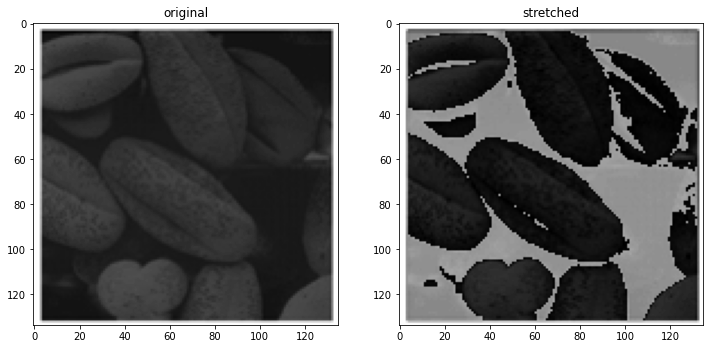

In [6]:
img = rgb2gray(io.imread('imgs/Picture2.png'))
#print(img.max())
newImg = Contrast_enhancement(img)
show_images([img,newImg],titles=["original","stretched"])

### Using for loop

In [7]:
def contrastloop(img):
    m,n = img.shape
    img = img * 255
    print("m = ",m,",n = ",n)
    newImg = np.copy(img)
    newImg = newImg.astype(np.uint8)
    count =0
    for i in range(0,m):
        for j in range(0,n):
            if(img[i][j]>=0 and img[i][j] <= 100):
                newImg[i][j] = 1.5*img[i][j]+50
                count +=1
    print("count of changed pixel = ",count)
    return newImg

<ipython-input-8-a052773bbe36>:1: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  img = rgb2gray(io.imread('imgs/Picture2.png'))


m =  134 ,n =  135
count of changed pixel =  5618


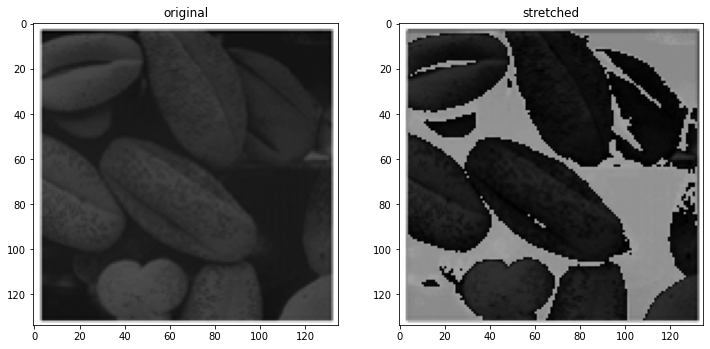

In [8]:
img = rgb2gray(io.imread('imgs/Picture2.png'))
newImg = contrastloop(img)
show_images([img,newImg],titles=["original","stretched"])

## Testing 

[  0  50  75 100   0 100  75 100]


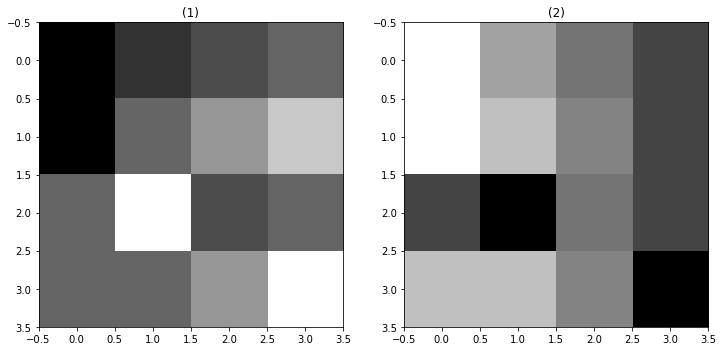

In [9]:
test = np.array(
    [
        [0,50,75,100],
        [0,101,150,200],
        [100,255,75,100],
        [101,101,150,255]
    ]
)
output = Contrast_enhancement(test/255)
show_images([test,output*255])


In [11]:
print(test)
print(output)

[[  0  50  75 100]
 [  0 101 150 200]
 [100 255  75 100]
 [101 101 150 255]]
[[ 50 125 162 200]
 [ 50 101 150 200]
 [200 255 162 200]
 [101 101 150 255]]


# Gamma Correction

### Explanation
assume input image is normalized [0-1]
1. how gamma value affects brightness of image?
    -  as gamma value increase (>1) values of new pixels will decrease exponentially.
       so image brightness decreases especially low pixel values will get more dark
    -  as gamma value decrease (<1) values of new pixel will increase exponentially.
       so image brigthness increases especially high pixel values will get more bright

In [12]:
'''
3
Gamma Correction
'''
def Gamma_Correction(img,c,gamma):
    
    
#     newImg = newImg.astype(np.uint8)
    newImg = c* (img**gamma)
    
    return newImg



<ipython-input-19-92170a59bfb2>:1: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  img = rgb2gray(io.imread('imgs/Picture2.png'))


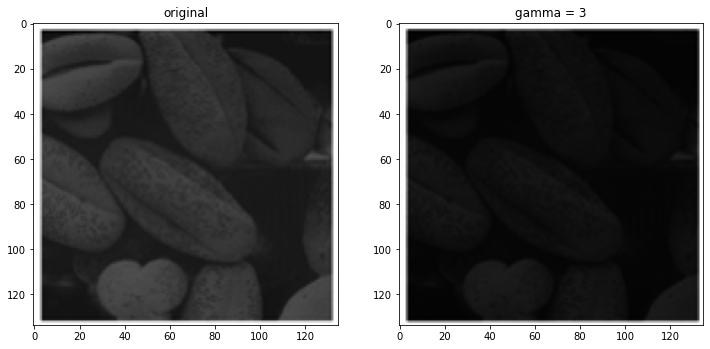

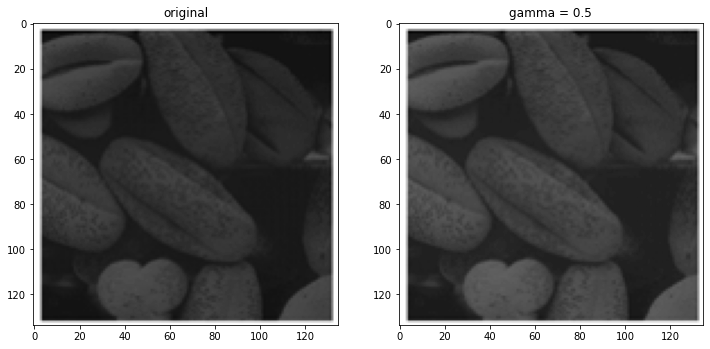

In [19]:
img = rgb2gray(io.imread('imgs/Picture2.png'))
newImg = Gamma_Correction(img,c=1,gamma=3)
show_images([img,newImg],titles=["original","gamma = 3"])
newImg = Gamma_Correction(img,c=1,gamma=0.5)
show_images([img,newImg],titles=["original","gamma = 0.5"])

In [33]:
'''
4 Histogram Eq.
Note: Histogram function of skimage returns only present intensity values not all 255
You can use showHist function from commonfunctions file
'''

def getImageWithHist(img,nbins=256):
    img = img*255
    img = img.astype(np.uint8)
    print(img.max())
    print(img.min())
    m,n = img.shape
    newImg = np.zeros((m,n))
    hist = np.zeros(nbins)
    print(hist.shape)
    for i in range(0,m):
        for j in range(0,n):
            hist[img[i][j]] +=1
    cumalitive = np.copy(hist)
    newValues = np.zeros(nbins)
    for i in range(1,nbins):
        cumalitive[i] =hist[i] + cumalitive[i-1]
    for i in range(0,nbins):
        newValues[i] = round( ((nbins-1) * cumalitive[i]) / (n*m))
    
    for i in range(0,m):
        for j in range(0,n):
            newImg[i][j] = newValues[img[i][j]]   

    return newImg,newValues



<ipython-input-34-5e1e95c13832>:1: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  img = rgb2gray(io.imread('imgs/pout.tif'))


182
32
(256,)


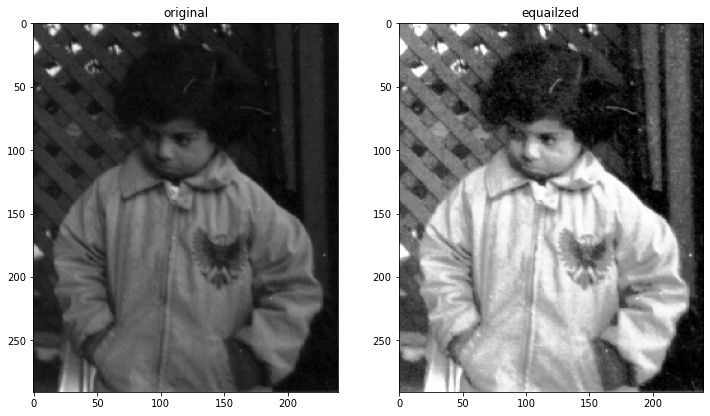

<ipython-input-34-5e1e95c13832>:6: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  img = rgb2gray(io.imread('imgs/tire.tif'))


255
0
(256,)


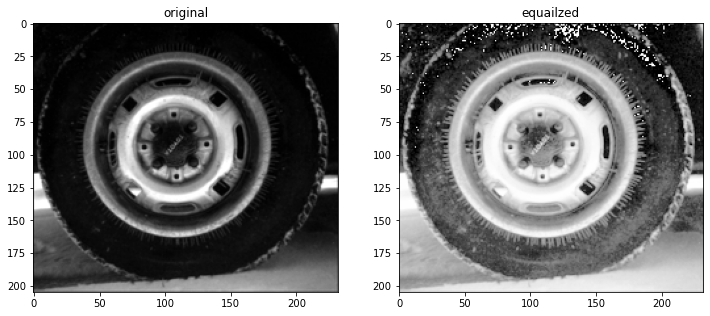

In [34]:
img = rgb2gray(io.imread('imgs/pout.tif'))
newImg ,hist= getImageWithHist(img, nbins=256)
newImg = Negative(newImg/255)
show_images([img,newImg],titles=["original","equailzed"])

img = rgb2gray(io.imread('imgs/tire.tif'))
newImg ,hist= getImageWithHist(img, nbins=256)
newImg = Negative(newImg/255)
show_images([img,newImg],titles=["original","equailzed"])

In [112]:
1.0e1

10.0

<ipython-input-15-70e72c8e99ca>:1: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  img = rgb2gray(io.imread('imgs/pout.tif'))


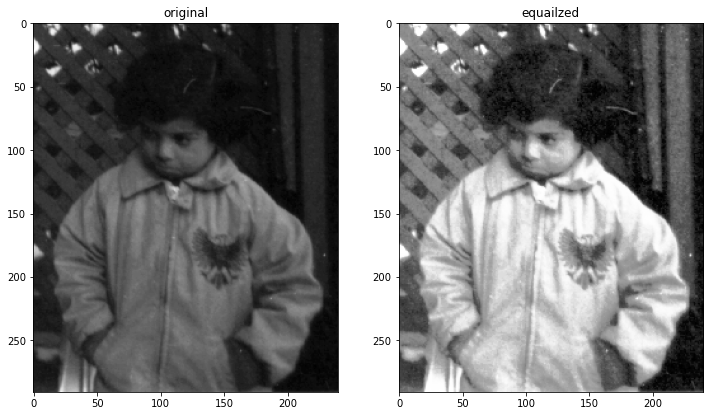

number of bins:  65
number of bins:  121


<ipython-input-15-70e72c8e99ca>:8: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  img = rgb2gray(io.imread('imgs/tire.tif'))


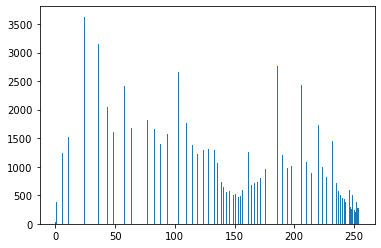

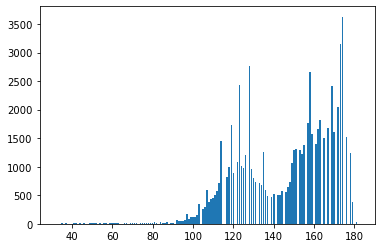

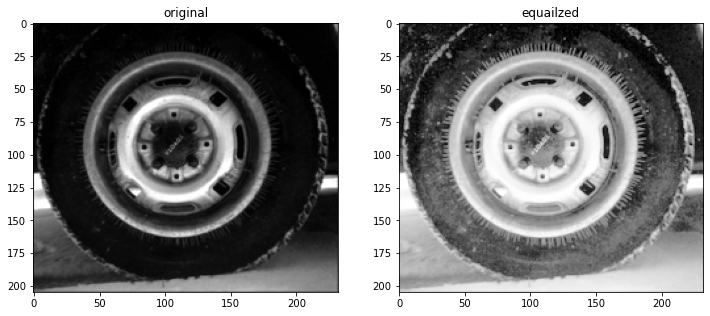

In [15]:
img = rgb2gray(io.imread('imgs/pout.tif'))
newImg = equalize_hist(img, nbins=256, mask=None)

show_images([img,newImg],titles=["original","equailzed"])
showHist(newImg*255)
showHist(img*255)

img = rgb2gray(io.imread('imgs/tire.tif'))
newImg = equalize_hist(img, nbins=256, mask=None)
show_images([img,newImg],titles=["original","equailzed"])